Swiggy Data Analysis

In [2]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt

1) Loading the file directory.

In [3]:
fd = open('/content/drive/MyDrive/Colab Notebooks/data.json', 'r')
js = fd.read()
fd.close()

js = json.loads(js)

Q1) Find the top 10 most common restaurant name in India.

In [4]:
rii = []                                                #rii(Restaurants In India)..empty list
for i in js.keys():                                     #iterating through every city
  if ('restaurants' in js[i].keys()):                   #checking if city as subregions 
    for j in js[i]['restaurants'].keys():               #iterating through every restaurant 
      rii.append(js[i]['restaurants'][j]['name'])       #putting the names in the list

  else:
    for k in js[i].keys():                              #iterating through every subregion of the city 
      for l in js[i][k]['restaurants'].keys():          #iterating through the restaurants 
        rii.append(js[i][k]['restaurants'][l]['name'])  #putting the names in the list

df_rii=pd.DataFrame(rii, columns=['RII'])              #converting the list into a dataframe

print(df_rii.groupby('RII').size().sort_values(ascending=False).head(10))  #top 10 same name restaurants

RII
Domino's Pizza                                     481
Pizza Hut                                          364
KFC                                                352
Kwality Walls Frozen Dessert and Ice Cream Shop    333
Baskin Robbins                                     321
Subway                                             271
The Good Bowl                                      237
Faasos - Wraps & Rolls                             236
The Biryani Life                                   235
Oven Story Pizza                                   232
dtype: int64


Above are the top 10 restaurant's name in India.

Q2) Find the top 10 most common restaurant name in Bangalore.

In [5]:
rib = []                                                                      #rib (Restaurants in Bangalore)..empty list

for i in js['Bangalore'].keys():                                              #for iterating through all the subregions.
  for j in js['Bangalore'][i]['restaurants'].keys():                          #for iterating through all the restaurants in the sub region.
    rib.append(js['Bangalore'][i]['restaurants'][j]['name'])                  #getting all restaurant's name
 
df_rib=pd.DataFrame(rib, columns=['RIB'])                                     #converting the list into a dataframe

print(df_rib.groupby('RIB').size().sort_values(ascending=False).head(10))     #using the groupby function to find top 10 restaurant names.

RIB
Domino's Pizza                                     31
Kwality Walls Frozen Dessert and Ice Cream Shop    29
Baskin Robbins                                     29
KFC                                                28
Faasos - Wraps & Rolls                             28
Faasos' Signature Wraps & Rolls                    28
Kanti Sweets                                       27
Pastas By Pizza Hut                                27
Firangi Bake                                       27
The Biryani Life                                   27
dtype: int64


Above are the top 10 restaurant names in the city of Bangalore.

Q3) How many branches of Dominos are there in the dataset.

In [6]:
rii = []                                                #rii(Restaurants In India)..empty list
for i in js.keys():                                     #iterating through every city
  if ('restaurants' in js[i].keys()):                   #checking if city as subregions 
    for j in js[i]['restaurants'].keys():               #iterating through every restaurant 
      rii.append(js[i]['restaurants'][j]['name'])       #putting the names in the list

  else:
    for k in js[i].keys():                              #iterating through every subregion of the city 
      for l in js[i][k]['restaurants'].keys():          #iterating through the restaurants 
        rii.append(js[i][k]['restaurants'][l]['name'])  #putting the names in the list

print('Number of branches of Dominos in the dataset are' ,rii.count("Domino's Pizza"))

Number of branches of Dominos in the dataset are 481


Q4) Compare the number of branches on KFC, MacD, Dominos and
Subway (visualisation)

In [7]:
rii = []                                                #rii(Restaurants In India)..empty list
for i in js.keys():                                     #iterating through every city
  if ('restaurants' in js[i].keys()):                   #checking if city as subregions 
    for j in js[i]['restaurants'].keys():               #iterating through every restaurant 
      rii.append(js[i]['restaurants'][j]['name'])       #putting the names in the list

  else:
    for k in js[i].keys():                              #iterating through every subregion of the city 
      for l in js[i][k]['restaurants'].keys():          #iterating through the restaurants 
        rii.append(js[i][k]['restaurants'][l]['name'])  #putting the names in the list

restaurant = ["KFC","McDonald's","Domino's Pizza","Subway"]
branches= []
branches.append(rii.count("KFC"))
branches.append(rii.count("McDonald's"))
branches.append(rii.count("Domino's Pizza"))
branches.append(rii.count("Subway"))

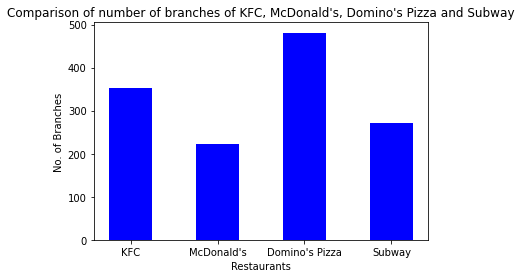

In [38]:
plt.bar(restaurant, branches, color = 'blue', width=.5)
plt.xlabel('Restaurants')
plt.ylabel('No. of Branches')
plt.title("Comparison of number of branches of KFC, McDonald's, Domino's Pizza and Subway")
plt.show()

Q5)Top 10 Most popular cuisines in terms of number of restaurants
serving (visualisation)

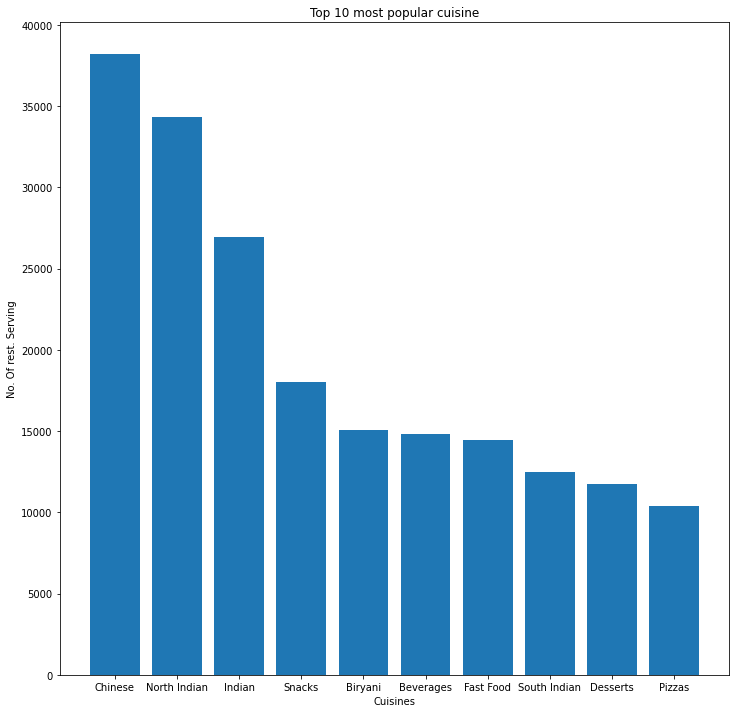

In [80]:
cuisine = []
lst=[]
for i in js.keys():
  if ('restaurants' in js[i].keys()):
    for j in js[i]['restaurants'].keys():
      if ('cuisine' in js[i]['restaurants'][j].keys()):
        cuisine += js[i]['restaurants'][j]['cuisine'].split(',')
      else:
        pass

  else:
    for k in js[i].keys():
      for l in js[i][k]['restaurants'].keys():
        if ('cuisine' in js[i][k]['restaurants'][l].keys()):
          cuisine += js[i][k]['restaurants'][l]['cuisine'].split(',')
        else:
          pass

df_c=pd.DataFrame(cuisine, columns=['Cuisine'])
for i in df_c['Cuisine'].unique():
  c=0
  c = cuisine.count(i)
  lst.append([i,c])

df_10=pd.DataFrame(lst, columns=['Cuisine','No. Of rest. Serving'])

fig,axis = plt.subplots(figsize= (12,12))
axis.bar (df_10.sort_values(by='No. Of rest. Serving', ascending=False).head(10)['Cuisine'], df_10.sort_values(by='No. Of rest. Serving', ascending=False).head(10)['No. Of rest. Serving'] )
plt.xlabel('Cuisines')
plt.ylabel('No. Of rest. Serving')
plt.title('Top 10 most popular cuisine')
plt.show()